# K-Medoids Clustering Algorithm (with sklearn)

### Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn_extra.cluster import KMedoids
from sklearn.metrics import silhouette_samples, silhouette_score

### Load dataset

In [2]:
myiris = datasets.load_iris()
x = myiris.data
y = myiris.target
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

### Normalization 

In [3]:
scaler = StandardScaler().fit(x)
x_scaled = scaler.transform(x)
kMedoids = KMedoids(n_clusters = 3, random_state = 0)
kMedoids.fit(x_scaled)
y_kmed = kMedoids.fit_predict(x_scaled)
y_kmed

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

In [4]:
kMedoids.inertia_

131.87877332824291

In [5]:
kMedoids = KMedoids(n_clusters = 3, random_state = 0)
kMedoids.fit(x_scaled)
y_kmed = kMedoids.fit_predict(x_scaled)
silhouette_avg = silhouette_score(x_scaled, y_kmed)
print(silhouette_avg)

0.4590416105554613


In [6]:
sample_silhouette_values = silhouette_samples(x_scaled, y_kmed)
for i in range(3):
    ith_cluster_silhouette_values = sample_silhouette_values[y_kmed == i]
    print(np.mean(ith_cluster_silhouette_values))

0.636330614585637
0.3768888598233938
0.36213487963471125


In [7]:
sw = []
for i in range(2, 11):
    kMedoids = KMedoids(n_clusters = i, random_state = 0)
    kMedoids.fit(x_scaled)
    y_kmed = kMedoids.fit_predict(x_scaled)
    silhouette_avg = silhouette_score(x_scaled, y_kmed)
    sw.append(silhouette_avg)

### Plotting Silhouette Score (efficiency)

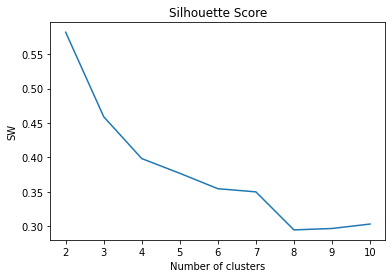

In [8]:
plt.plot(range(2, 11), sw)
plt.title('Silhouette Score')
plt.xlabel('Number of clusters')
plt.ylabel('SW')     
plt.show()

### Calculating Purity of algorithm

In [9]:
def purity_score(y_true, y_pred):
    # compute contingency matrix (also called confusion matrix)
    contingency_matrix = metrics.cluster.contingency_matrix(y_true, y_pred)
    # return purity
    return np.sum(np.amax(contingency_matrix, axis=0)) / np.sum(contingency_matrix)

In [10]:
kmedoids = KMedoids(n_clusters=3, random_state=0).fit(x_scaled)
y_kmed = kmedoids.fit_predict(x_scaled)
purity_score(y,y_kmed)

0.84

### Plotting Final Clusters with their Centres

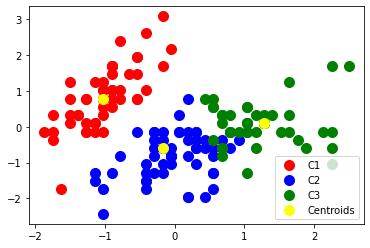

In [11]:
plt.scatter(x_scaled[y_kmed == 0, 0], x_scaled[y_kmed == 0, 1], s = 100, c = 'red', label = 'C1')
plt.scatter(x_scaled[y_kmed == 1, 0], x_scaled[y_kmed == 1, 1], s = 100, c = 'blue', label = 'C2')
plt.scatter(x_scaled[y_kmed == 2, 0], x_scaled[y_kmed == 2, 1], s = 100, c = 'green', label = 'C3')
plt.scatter(kmedoids.cluster_centers_[:, 0], kmedoids.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')
plt.legend()